# Define Process

This chapter explains how to define processes


### Facility
```python
class Facility:
    def __init__(self, name, *sensor, time=1):
```
* name: str => facility name
* sensor:list => sensors of facility
* time: int => failicty time(This has to do with how long it is stored in the log)

### Sensor
```python
class Sensor(BaseSensor):
    def __init__(self, name, mean_value, sigma, distribution) -> None:
```
* name: str => sensor name
* mean_value:int => mean_value of sensor
* distribuition:str => you can use normal, 

First you have to define as many facilities as you want

In [1]:
from factory.facility import Facility
from factory.sensor import Sensor
from factory.gate import *

normal = {
    'distribution': 'normal',
    'mu': 0,
    'sig': 1,
}

uniform = {
    'distribution': 'uniform',
    'lo': 0,
    'hi': 1
}

fa1 = Facility('test1', Sensor('test_sensor1', normal), time=1)
fa2 = Facility('test2', Sensor('test_sensor2', normal), time=2)
fa3 = Facility('test3', Sensor('test_sensor3', normal), time=3)
fa4 = Facility('test4', Sensor('test_sensor4', normal), time=5)
fa5 = Facility('test5', Sensor('test_sensor5', uniform), time=10)
fa6 = Facility('test6', Sensor('test_sensor6', uniform), time=5)
fa7 = Facility('test7', Sensor('test_sensor7', uniform), time=50)
fa8 = Facility('test8', Sensor('test_sensor8', uniform), time=50)


### Data Generator

Based here: https://github.com/makinarocks/Mandrova/blob/master/tutorials/chapter1_data_generation.ipynb

Several distributions are available.

We provide the default payload here.

```python
NORMAL = {
  'distribution' : "normal",
  'mu' : 0,
  'sigma' : 1
}

LOGNORMAL = {
  'distribution' : "lognormal",
  'mu' : 0,
  'sigma' : 1
}

GAMMA = {
  'distribution' : 'gamma',
  'alpha' : 0.5,
  'beta' : 0.5
}

BETA = {
  'distribution' : 'beta',
  'alpha' : 0.5,
  'beta' : 0.5
}

UNIFORM = {
  'distribution' : 'uniform',
  'lo' : 0,
  'hi' : 1
}

EXPONENTIAL = {
  'distribution' : 'exponential',
  'lambd' : 1.0
}
```

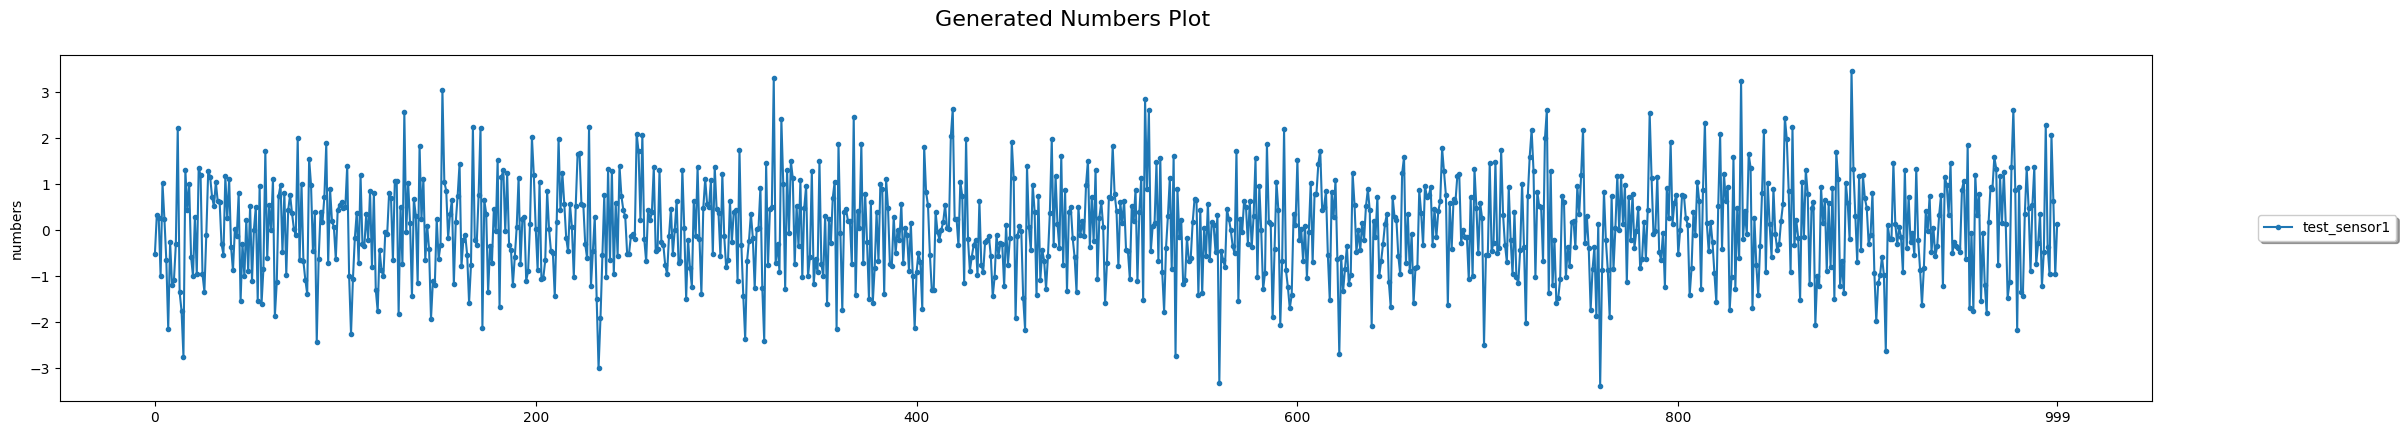

In [13]:
from factory.sensor import Sensor

Normal = {
    'distribution': 'normal',
    'mu': 0,
    'sigma': 1,
}

sensor = Sensor('test_sensor1', Normal)

sensor.view_sensor_data_plot(1000)

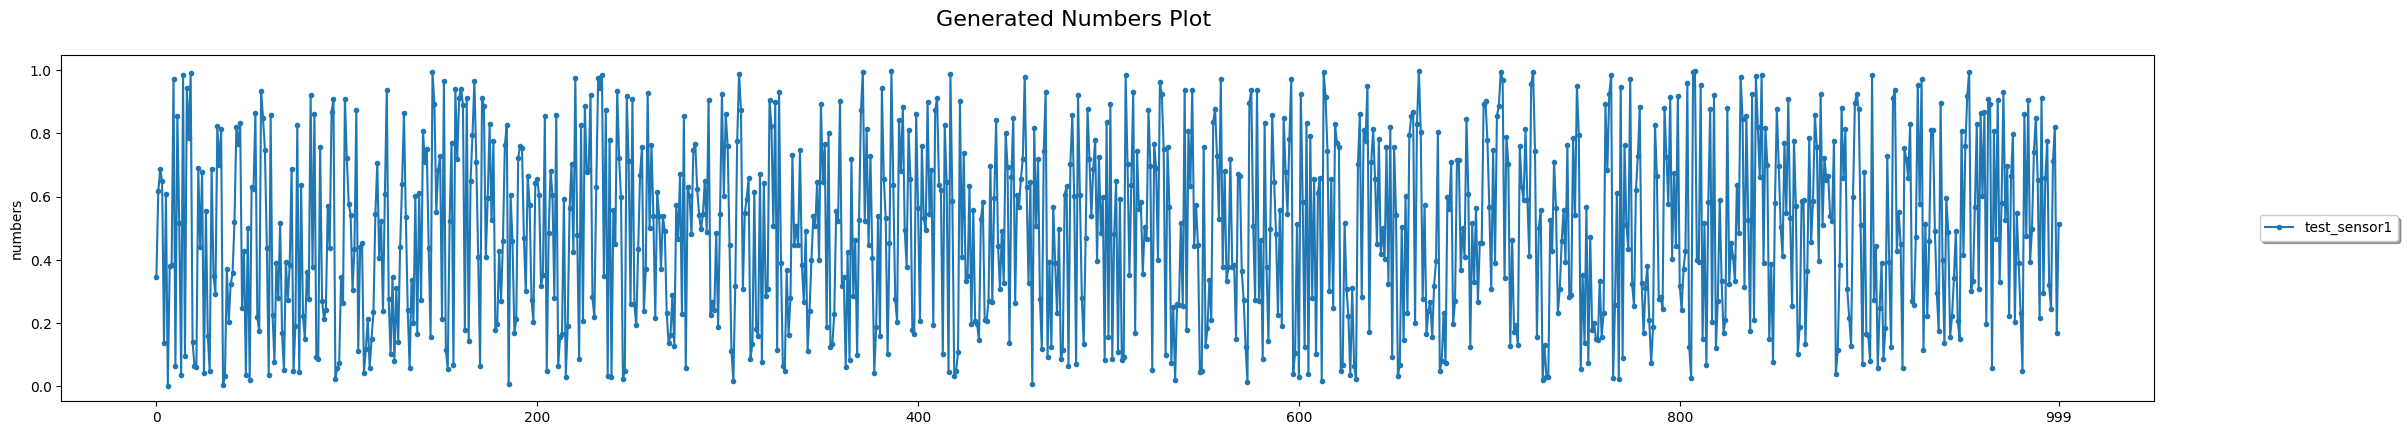

In [14]:
from factory.sensor import Sensor

UNIFORM = {
  'distribution' : 'uniform',
  'lo' : 0,
  'hi' : 1
}

sensor = Sensor('test_sensor1', UNIFORM)

sensor.view_sensor_data_plot(1000)

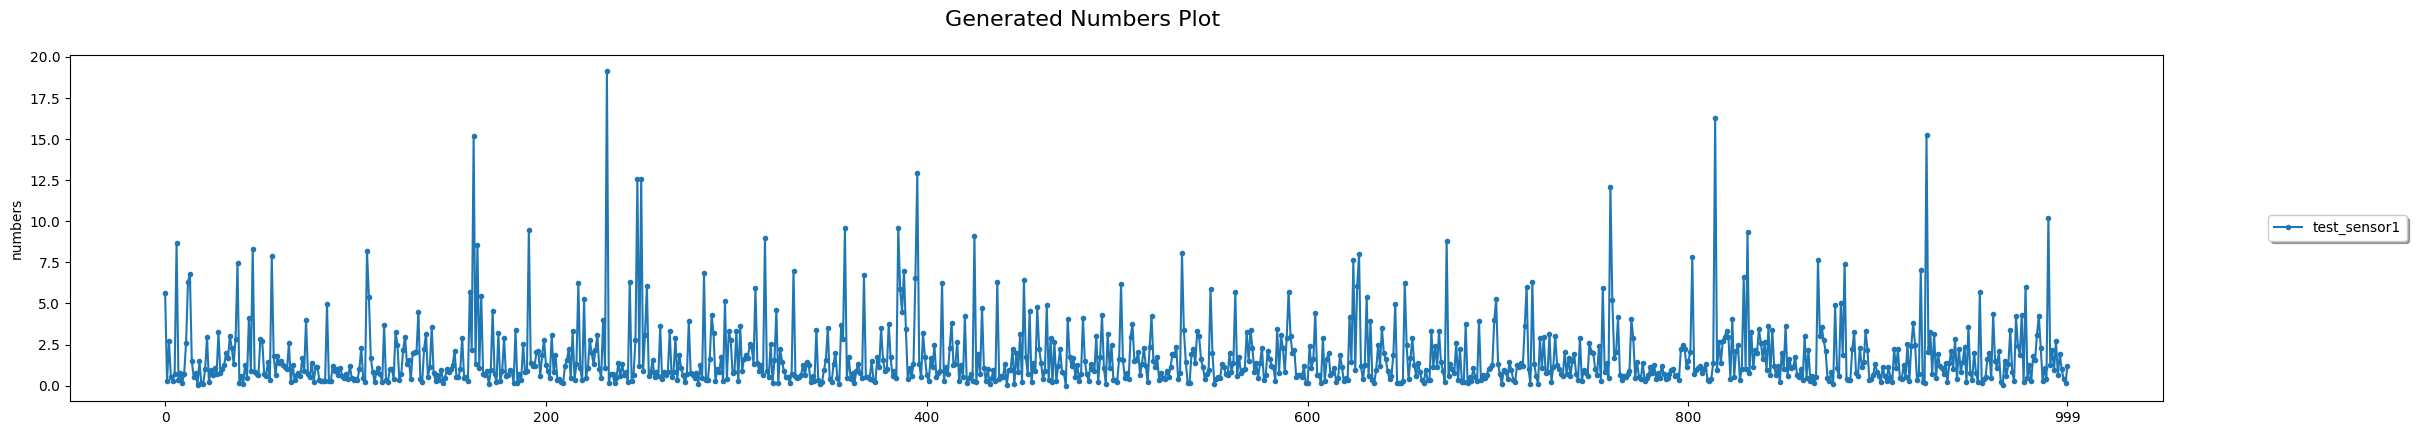

In [4]:
from factory.sensor import Sensor

LOGNORMAL = {
  'distribution' : "lognormal",
  'mu' : 0,
  'sigma' : 1
}


sensor = Sensor('test_sensor1', LOGNORMAL)

sensor.view_sensor_data_plot(1000)

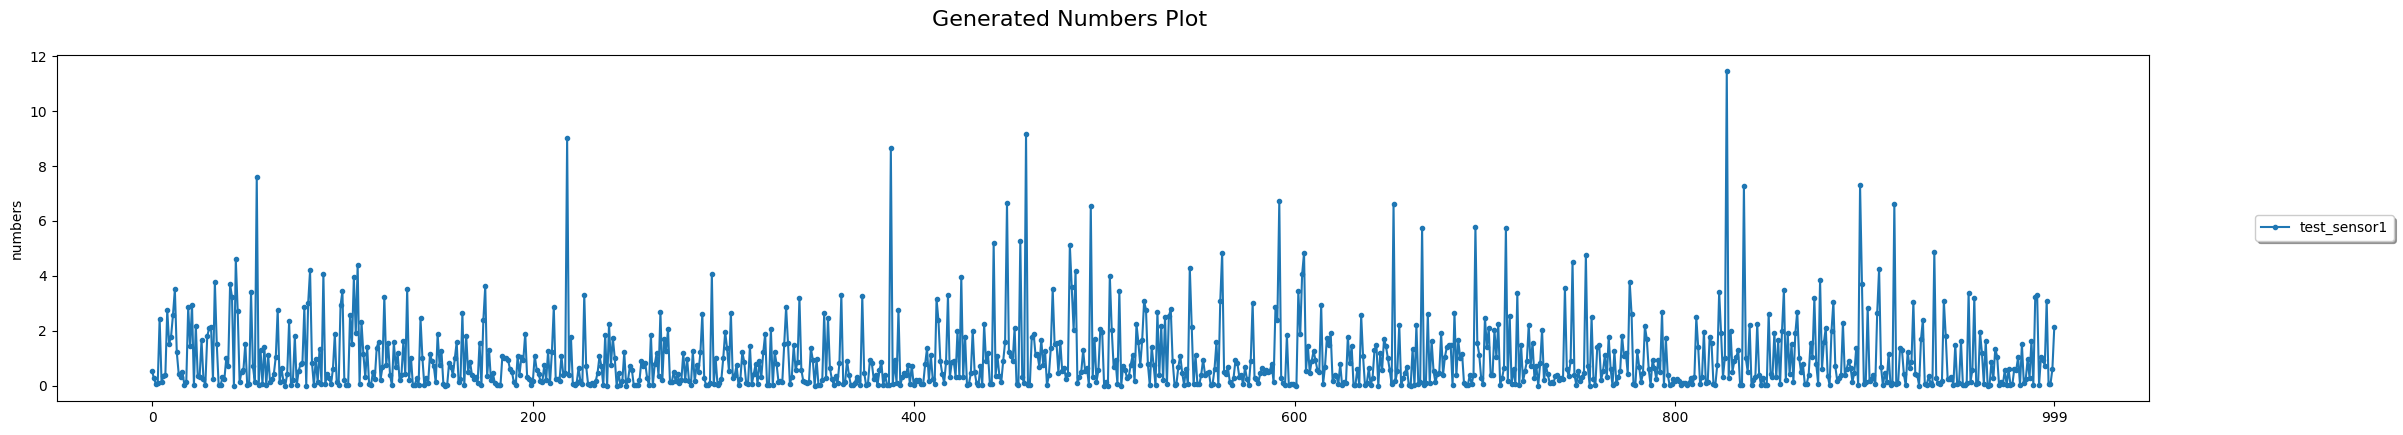

In [5]:
from factory.sensor import Sensor

GAMMA = {
  'distribution' : 'gamma',
  'alpha' : 0.5,
  'beta' : 0.5
}

sensor = Sensor('test_sensor1', GAMMA)

sensor.view_sensor_data_plot(1000)

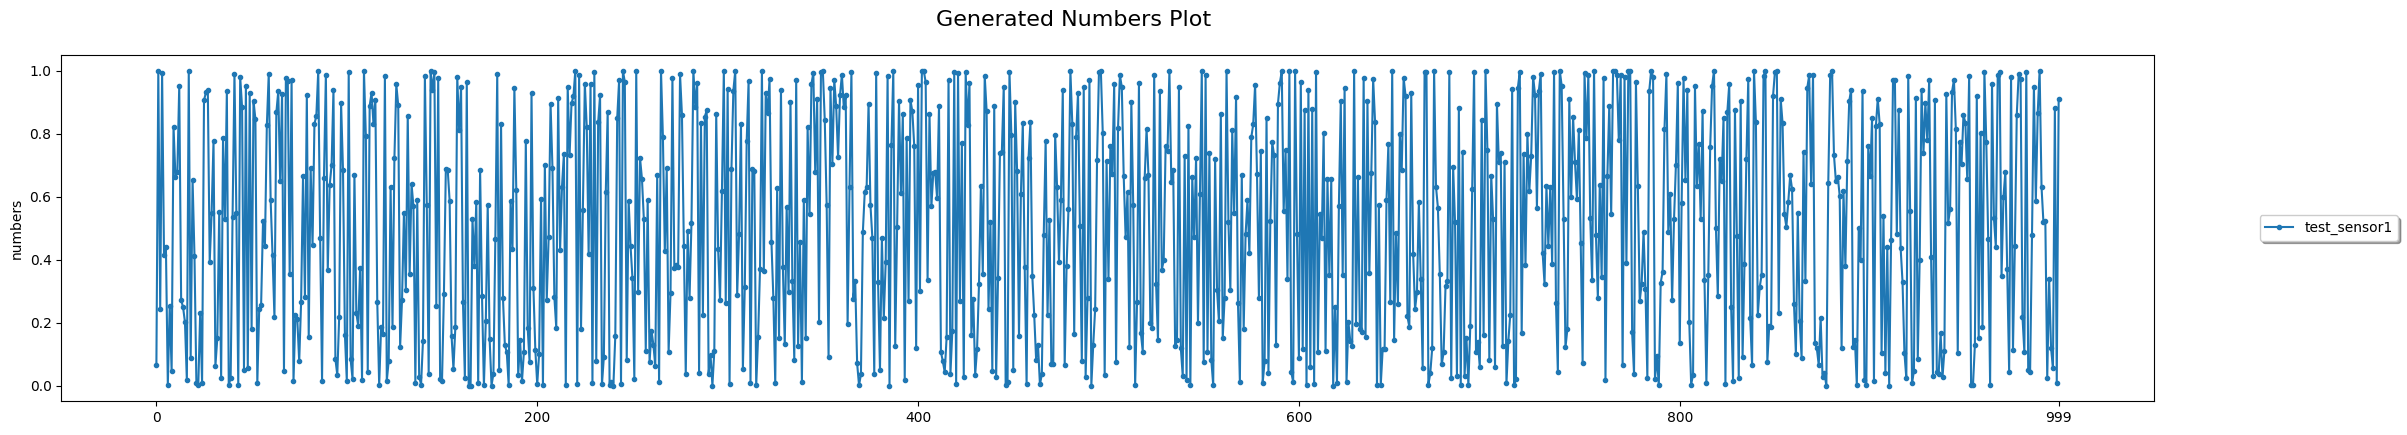

In [15]:
from factory.sensor import Sensor

BETA = {
  'distribution' : 'beta',
  'alpha' : 0.5,
  'beta' : 0.5
}

sensor = Sensor('test_sensor1', BETA)

sensor.view_sensor_data_plot(1000)


### Define the Process

Defines the movement path of the defined facilities.

### Or Gate
```python
class SeqLoop:
  def __init__(self, node) -> None:
          self.next = node
```
* node: Facility => next facility

By default, SeqLoop only goes to one next node.
When selecting a node that has already been passed as the next node, a loop is executed.

```python
class Or:
    def __init__(self, bp: list = [], node: list = []) -> None:
        self.next = node
        if not bp:
            raise TypeError('bp is not define Or(bp:list, node:list)')
        self.branch_probability = bp
```

* bp: list => Specifies the branch probability of each node.

Basically, among several nodes, one node is selected according to the branch probability and proceeds.



### Notice

* When defining a process, you must define a start and end node.
* The start node is entered as an input variable when defining the processor, but the end node can be defined by entering None when defining the root.

In [7]:
route = {
    fa1.name: Or([0.5, 0.5], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: SeqLoop(fa4),
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([0.2, 0.8], node=[fa6, fa7]),
    fa6.name: SeqLoop(fa5),
    fa7.name: None
}

### Check the Process

Visualize the defined process and check if each node is well connected.


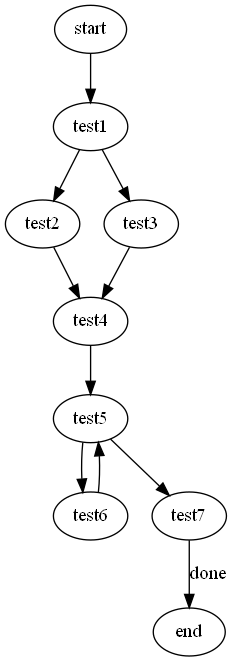

In [8]:
from miner.visualize import ProcessVisualize
# Tutorial1 visualize
ProcessVisualize(path='./', name='test_process', comment='test', filename='test').visuallizer(fa1, route=route, view_now=True)

'// test\nstrict digraph test_process {\n\ttest1\n\tstart\n\tstart -> test1\n\ttest2\n\ttest1 -> test2\n\ttest3\n\ttest1 -> test3\n\ttest4\n\ttest3 -> test4\n\ttest5\n\ttest4 -> test5\n\ttest6\n\ttest5 -> test6\n\ttest7\n\ttest5 -> test7\n\tend\n\ttest7 -> end [label=done]\n\ttest5\n\ttest6 -> test5\n\ttest4\n\ttest2 -> test4\n}\n'

#### If each node is not connected well

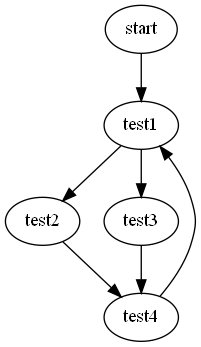

This is a case of poor connectivity, as 7 facilities were defined and route, but only 4 nodes appeared in the graph.

In [12]:
from miner.visualize import ProcessVisualize

route = {
    fa1.name: Or([0.5, 0.5], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: SeqLoop(fa4),
    fa4.name: SeqLoop(fa1),
    fa5.name: Or([0.2, 0.8], node=[fa6, fa7]),
    fa6.name: SeqLoop(fa5),
    fa7.name: None
}

ProcessVisualize(path='./', name='not_connected', comment='test', filename='not_connected').visuallizer(fa1, route=route, view_now=True)

'// test\nstrict digraph not_connected {\n\ttest1\n\tstart\n\tstart -> test1\n\ttest2\n\ttest1 -> test2\n\ttest3\n\ttest1 -> test3\n\ttest4\n\ttest3 -> test4\n\ttest1\n\ttest4 -> test1\n\ttest4\n\ttest2 -> test4\n}\n'

### If there is no end node

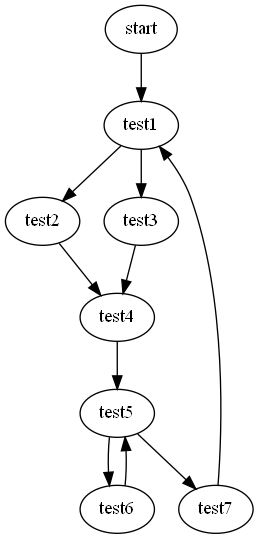


In this case, the process will run in an infinite loop.


In [14]:
from miner.visualize import ProcessVisualize

route = {
    fa1.name: Or([0.5, 0.5], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: SeqLoop(fa4),
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([0.2, 0.8], node=[fa6, fa7]),
    fa6.name: SeqLoop(fa5),
    fa7.name: SeqLoop(fa1)
}

ProcessVisualize(path='./', name='no_end_node', comment='test', filename='no_end_node').visuallizer(fa1, route=route, view_now=True)

'// test\nstrict digraph no_end_node {\n\ttest1\n\tstart\n\tstart -> test1\n\ttest2\n\ttest1 -> test2\n\ttest3\n\ttest1 -> test3\n\ttest4\n\ttest3 -> test4\n\ttest5\n\ttest4 -> test5\n\ttest6\n\ttest5 -> test6\n\ttest7\n\ttest5 -> test7\n\ttest1\n\ttest7 -> test1\n\ttest5\n\ttest6 -> test5\n\ttest4\n\ttest2 -> test4\n}\n'

### If there are multiple end nodes

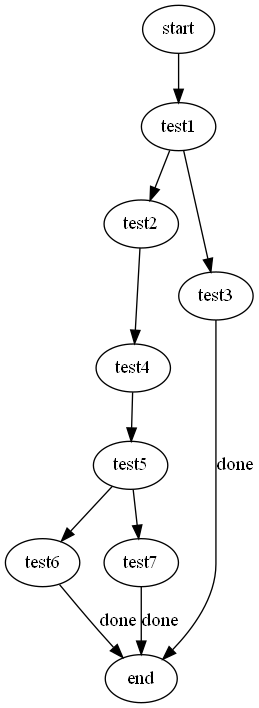

It is possible to set multiple end nodes.

In [13]:
from miner.visualize import ProcessVisualize

route = {
    fa1.name: Or([0.5, 0.5], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: None,
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([0.2, 0.8], node=[fa6, fa7]),
    fa6.name: None,
    fa7.name: None,
}

ProcessVisualize(path='./', name='multiple_end_nodes', comment='test', filename='multiple_end_nodes').visuallizer(fa1, route=route, view_now=True)

'// test\nstrict digraph multiple_end_nodes {\n\ttest1\n\tstart\n\tstart -> test1\n\ttest2\n\ttest1 -> test2\n\ttest3\n\ttest1 -> test3\n\tend\n\ttest3 -> end [label=done]\n\ttest4\n\ttest2 -> test4\n\ttest5\n\ttest4 -> test5\n\ttest6\n\ttest5 -> test6\n\tend\n\ttest6 -> end [label=done]\n\ttest7\n\ttest5 -> test7\n\tend\n\ttest7 -> end [label=done]\n}\n'

### Visualize process with sensor

if you want to visualize the procee with sensors, just add option in ProcessVisualize.visualizer()

```python
def visuallizer(self, start_node, route, view_now=False, veiw_sensor=False):
```

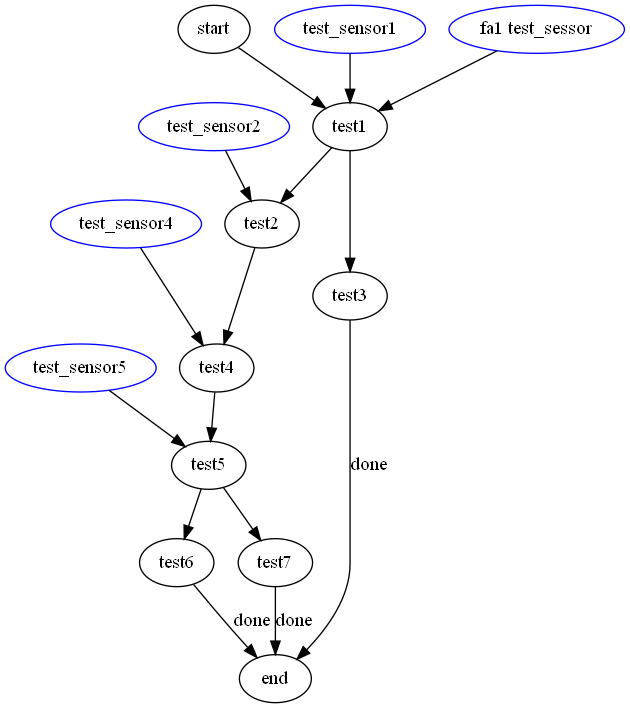

In [21]:
from miner.visualize import ProcessVisualize

route = {
    fa1.name: Or([0.5, 0.5], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: None,
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([0.2, 0.8], node=[fa6, fa7]),
    fa6.name: None,
    fa7.name: None,
}

ProcessVisualize(path='./', name='grahp_with_sensor', comment='test', filename='grahp_with_sensor').visuallizer(fa1, route=route, view_now=True, veiw_sensor=True)

'// test\nstrict digraph grahp_with_sensor {\n\ttest1\n\tstart\n\tstart -> test1\n\ttest_sensor1 [color=blue]\n\ttest_sensor1 -> test1\n\t"fa1 test_sessor" [color=blue]\n\t"fa1 test_sessor" -> test1\n\ttest2\n\ttest1 -> test2\n\ttest3\n\ttest1 -> test3\n\tend\n\ttest3 -> end [label=done]\n\ttest_sensor2 [color=blue]\n\ttest_sensor2 -> test2\n\ttest4\n\ttest2 -> test4\n\ttest_sensor4 [color=blue]\n\ttest_sensor4 -> test4\n\ttest5\n\ttest4 -> test5\n\ttest_sensor5 [color=blue]\n\ttest_sensor5 -> test5\n\ttest6\n\ttest5 -> test6\n\tend\n\ttest6 -> end [label=done]\n\ttest7\n\ttest5 -> test7\n\tend\n\ttest7 -> end [label=done]\n}\n'

### Run the Process

```python
class CallStackProcessor(BaseProcessor):
    def __init__(self, start_node, route):
```

* start_node: Facility => start facility in the route

It uses a heap data structure.

```python
def to_dataframe(self, iter): #return it to data frame

def to_csv(self, iter, path): # return to csv
```

In [23]:
from process.processor_stack import CallStackProcessor

processsor = CallStackProcessor(start_node=fa1,
                       route=route)

df = processsor.to_dataframe(100)

df

  test_sensor6
0     0.825068


,token_id,facility,@timestamp,test_sensor1,fa1 test_sessor,test_sensor2,test_sensor3,test_sensor4,test_sensor5,test_sensor6,test_sensor7
0,8UEX9UGUK7,test1,2023-07-31 15:56:07,-0.495451,True,NaN,NaN,NaN,NaN,NaN,NaN
1,Q45SQSVYKN,test1,2023-07-31 15:56:08,-0.811967,True,NaN,NaN,NaN,NaN,NaN,NaN
2,U47FY4J5NV,test1,2023-07-31 15:56:09,0.341188,True,NaN,NaN,NaN,NaN,NaN,NaN
3,GM3WVA9CGR,test1,2023-07-31 15:56:10,0.094461,True,NaN,NaN,NaN,NaN,NaN,NaN
4,7PSXF4BWFG,test1,2023-07-31 15:56:11,-0.496086,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
375,ZA392A78SS,test6,2023-07-31 17:35:50,NaN,None,NaN,NaN,NaN,NaN,0.829285,NaN
376,ZM44TNHMF8,test5,2023-07-31 17:35:55,NaN,None,NaN,NaN,NaN,0.456613,NaN,NaN
377,ZM44TNHMF8,test6,2023-07-31 17:36:00,NaN,None,NaN,NaN,NaN,NaN,0.620795,NaN
378,ZXV736R54V,test5,2023-07-31 17:36:05,NaN,None,NaN,NaN,NaN,0.019053,NaN,NaN


### Huristic visualizer

After creating data with the defined process, you can visualize how far each route has passed.

```python
def huristic_visualizer(self, start_node, route, df: pd.DataFrame, view_now=False, veiw_sensor=False):
```

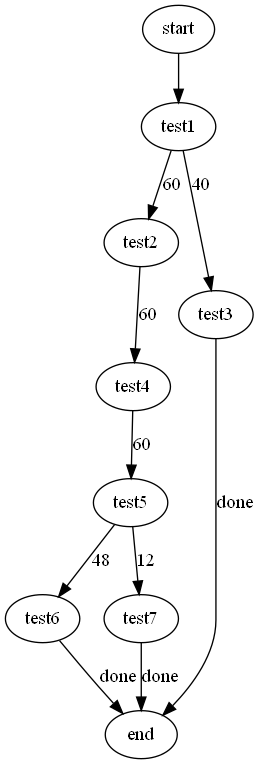

In [4]:
from miner.visualize import ProcessVisualize

route = {
    fa1.name: Or([0.5, 0.5], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: None,
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([0.2, 0.8], node=[fa6, fa7]),
    fa6.name: None,
    fa7.name: None,
}

ProcessVisualize(path='./', name='huristic_visualizer', comment='test', filename='huristic_visualizer').huristic_visualizer(fa1, route=route, df=df,view_now=True)

defaultdict(int,
            {'test1,test3': 41,
             'test1,test2': 59,
             'test2,test4': 59,
             'test4,test5': 59,
             'test5,test6': 47,
             'test5,test7': 12})

### Plot Data

* Data generated by each process can be visualized.
* We can use Analyzer class to Can be separated by facility

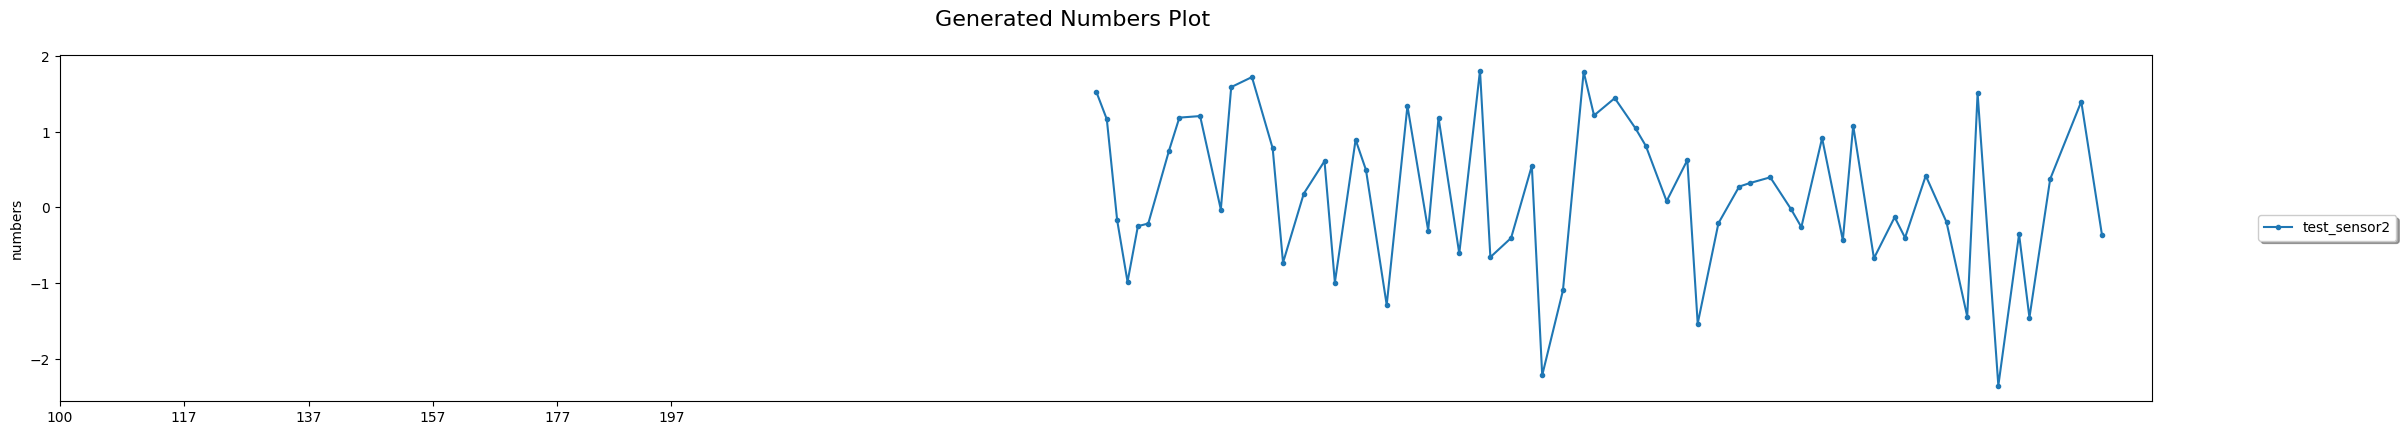

In [4]:
from miner.analyzer import Analyzer
from miner.visualize import PlotData
from miner.visualize import ProcessVisualize
from process.processor_stack import CallStackProcessor
from factory.gate import *

route = {
    fa1.name: Or([1, 11], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: SeqLoop(fa4),
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([1, 10000], node=[fa6, fa7]),
    fa6.name: SeqLoop(fa5),
    fa7.name: None
}

processor = CallStackProcessor(fa1, route)
df = processor.to_dataframe(100)

data = Analyzer().seperate_by_facilities(df)

PlotData().sensor_data_view_plot(data.get(fa2.name), 'test_sensor2')

### On Develop

* Can create options to process only the data of the desired conditions
* this is not stable

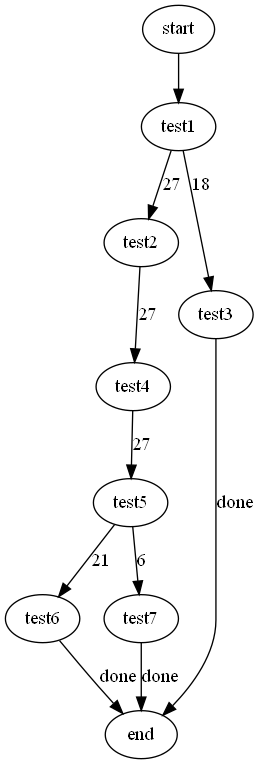


In the code example below, you can see that even though 100 tokens are entered, the total number of tokens processed by test1 is less than 50.

In other words, depending on the option you add, you can decide whether the token will continue or not.

In [2]:
from miner.visualize import ProcessVisualize
from process.processor_stack import CallStackProcessor
from factory.gate import *

route = {
    fa1.name: Or([1, 11], [fa2, fa3]),
    fa2.name: SeqLoop(fa4),
    fa3.name: SeqLoop(fa4),
    fa4.name: SeqLoop(fa5),
    fa5.name: Or([1, 10000], node=[fa6, fa7]),
    fa6.name: SeqLoop(fa5),
    fa7.name: None
}
processor = CallStackProcessor(fa1, route)
df = processor.to_dataframe(100)

ProcessVisualize(path='./', name='with_options', comment='test', filename='with_options').huristic_visualizer(fa1, route=route, df=df,view_now=True)

# len(processor.break_points)


defaultdict(int,
            {'test1,test3': 45,
             'test1,test2': 55,
             'test3,test4': 45,
             'test2,test4': 55,
             'test4,test5': 100,
             'test5,test7': 100,
             'test5,test6': 20,
             'test6,test5': 20})